In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
data=pd.read_csv('country.csv')


In [3]:
data.head(10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


In [4]:
data.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165877
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846989
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [5]:
data_1972=data[data['year']==1972]
data_1972.shape

(142, 6)

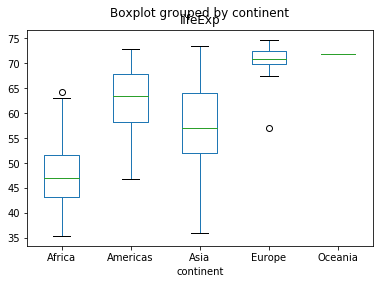

In [6]:
data_1972.boxplot(by='continent',column=['lifeExp'],grid=False)

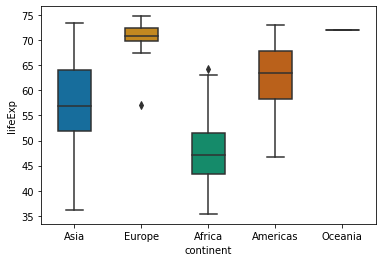

In [7]:
sb.boxplot(x='continent',y='lifeExp',data=data_1972,width=0.5,palette='colorblind')

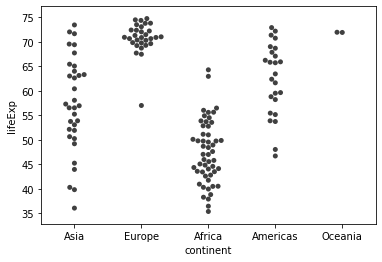

In [8]:
sb.swarmplot(y='lifeExp', x='continent',
              data=data_1972, 
              color='black',
              alpha=0.75)

In [11]:
#life expectancy of Nepal higher than 50
data.loc[(data["country"]=="Nepal")&(data["lifeExp"]>50), ["country", "year", "lifeExp"]]

,country,year,lifeExp
1075,Nepal,1987,52.537
1076,Nepal,1992,55.727
1077,Nepal,1997,59.426
1078,Nepal,2002,61.340
1079,Nepal,2007,63.785


In [28]:
#working with functions
def missing(x):
    return sum(x.isnull())

print ("Missing values per column: ")
print (data.apply(missing, axis=0)) #axis=0 means that function is applied on each column

print ("\nMissing values per row: ")
print (data.apply(missing, axis=1).head()) #axis=0 means that function is applied on each row


Missing values per column: 
country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

Missing values per row: 
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [29]:
from scipy.stats import mode
mode(data['lifeExp'])

ModeResult(mode=array([69.39]), count=array([4]))

In [30]:
mode(data['lifeExp']).mode[0]

69.39

In [32]:
#fills the missing value with the mode/frequent value
data['year'].fillna(mode(data['year']).mode[0], inplace=True)
print(data.apply(missing, axis=0))

country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64


In [46]:
#life expectancy according to year on each continent
table=data.pivot_table(values=["lifeExp"], index=(['year']), columns='continent', aggfunc=np.mean)
table

lifeExp                                         
continent     Africa  Americas       Asia     Europe  Oceania
year                                                         
1952       39.135500  53.27984  46.314394  64.408500  69.2550
1957       41.266346  55.96028  49.318544  66.703067  70.2950
1962       43.319442  58.39876  51.563223  68.539233  71.0850
1967       45.334538  60.41092  54.663640  69.737600  71.3100
1972       47.450942  62.39492  57.319269  70.775033  71.9100
1977       49.580423  64.39156  59.610556  71.937767  72.8550
1982       51.592865  66.22884  62.617939  72.806400  74.2900
1987       53.344788  68.09072  64.851182  73.642167  75.3200
1992       53.629577  69.56836  66.537212  74.440100  76.9450
1997       53.598269  71.15048  68.020515  75.505167  78.1900
2002       53.325231  72.42204  69.233879  76.700600  79.7400
2007       54.806038  73.60812  70.728485  77.648600  80.7195